# Bibliotecas

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LinearRegression, Lasso, Ridge, ElasticNet
from sklearn.preprocessing import StandardScaler, OrdinalEncoder
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.preprocessing import StandardScaler
from sklearn import linear_model
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import cross_val_score
from sklearn.metrics import  r2_score
from sklearn.metrics import confusion_matrix
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import GridSearchCV
from sklearn.feature_selection import VarianceThreshold
from sklearn.metrics import roc_curve
from sklearn.metrics import plot_roc_curve
import sklearn.metrics as metrics
from sklearn.preprocessing import KBinsDiscretizer
import warnings
warnings.filterwarnings('ignore')

from collections import Counter

from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV, cross_val_score, StratifiedKFold, learning_curve
from sklearn.feature_selection import SelectFromModel, SelectKBest
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import cross_val_score

sns.set(style='white', context='notebook', palette='deep')
pd.options.display.max_columns = 100

# Funciones

In [ ]:
def roc(modelo,X_test,y_test):
    probs = modelo.predict_proba(X_test)
    preds = probs[:,1]
    fpr, tpr, threshold = metrics.roc_curve(y_test, preds)
    roc_auc = metrics.auc(fpr, tpr)
    plt.title(modelo)
    plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
    plt.legend(loc = 'lower right')
    plt.plot([0, 1], [0, 1],'r--')
    plt.xlim([0, 1])
    plt.ylim([0, 1])
    plt.ylabel('Tasa de verdaderos positivos')
    plt.xlabel('Tasa de falsos positivos')
    return plt.show()
def importancia_columnas(model, fea_names):
    fea_imp = []
    tops = []
    fea = model.feature_importances_
    idx = np.argsort(fea)
    fea_imp.append(fea)
    tops.append(fea_names[idx][:3])
    # print fea_names[idx][:3]
    plt.figure()
    plt.title("Feature importances")
    plt.barh(range(len(fea)), fea[idx], align="center")
    plt.yticks(range(len(fea)), fea_names[idx])
    plt.ylim([-1, len(fea)])
    plt.show()
    return fea_imp, tops


# Dataset


In [1]:
df=pd.read_csv("asistencia_limpio3.csv")

In [4]:
#preprocesado del dataset // Probar con un getdummies de las demas tmb
def data_cleaning(df):
    dropLst = ["genero","nacionalidad2","edad","numero_total_visitas","dia_semana","fecha_cita",
               "departamento","asistencia","horario_inicio","semana","año"]
   
    kbd=KBinsDiscretizer(n_bins=3, encode='ordinal', strategy='uniform')#como hay muchos outliers en km, lo discretizo
    df["km"]=kbd.fit_transform(df[["km"]])
    df[["genero_masc","genero_fem"]]=pd.get_dummies(df.genero)
    df[pd.get_dummies(df.horario_inicio).columns]=pd.get_dummies(df.horario_inicio)
    df[pd.get_dummies(df.dia_semana).columns]=pd.get_dummies(df.dia_semana)
    df[pd.get_dummies(df.semana).columns]=pd.get_dummies(df.semana)
    df[["nac_esp","nac_no_esp"]]=pd.get_dummies(df.nacionalidad2)
    df[pd.get_dummies(df.año).columns]=pd.get_dummies(df.año)

    feature_names = df.drop(dropLst, axis=1).columns
    X = df.drop(dropLst, axis=1).values
    y = df['asistencia'].replace("SI",1).replace("NO",0)
    
    return X, y, feature_names

# Particion y prueba de modelos

In [5]:
X=data_cleaning(df)[0]
y=data_cleaning(df)[1]
col_names=data_cleaning(df)[2]
df2=pd.DataFrame(X,columns=col_names)
df2["asistencia"]=y

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=.2, random_state=42)

In [8]:
# Balanceo del dataset, sin modificar ni escalar columnas, unicamente cambiados los objects
res=SMOTE()
X_res,y_res=res.fit_resample(X_train,y_train)

In [13]:
model_rfc=RandomForestClassifier(max_depth=4,n_estimators=400)
model_rfc.fit(X_res,y_res)

RandomForestClassifier(max_depth=4, n_estimators=400)

In [14]:
model_rfc.score(X_test,y_test)

0.7267358909321496

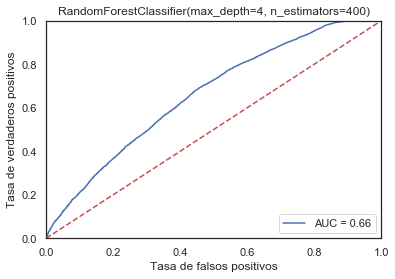

In [15]:
roc(model_rfc,X_test,y_test)

In [60]:
df.asistencia.value_counts()

SI    207985
NO     44333
Name: asistencia, dtype: int64

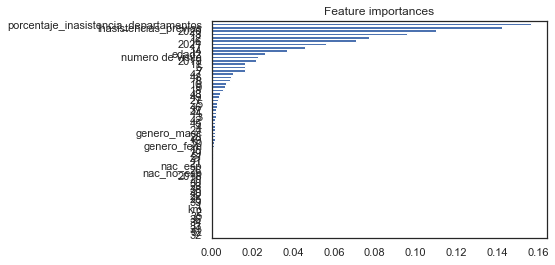

([array([2.60246642e-02, 6.95160875e-06, 2.25838418e-02, 1.42418020e-01,
         1.56459933e-01, 1.52902157e-03, 1.01966995e-03, 8.82374308e-03,
         6.54674398e-03, 6.92696269e-03, 1.65162631e-02, 7.74075085e-02,
         9.56649183e-02, 3.71789037e-02, 7.88719524e-04, 7.08704619e-02,
         4.58436095e-02, 5.54666055e-03, 1.46360198e-03, 2.23509133e-04,
         3.96473942e-04, 1.55885485e-04, 1.08965593e-05, 6.85718051e-07,
         2.13441257e-03, 1.63660987e-03, 2.74608065e-03, 1.64865864e-02,
         1.62194530e-02, 2.01996750e-04, 1.54591775e-03, 1.43681579e-04,
         3.04024356e-04, 3.23877913e-03, 1.52773089e-03, 7.66570218e-04,
         2.04968629e-04, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
         0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 2.18493360e-03,
         1.88252998e-04, 4.04166904e-05, 1.63141710e-04, 4.01128709e-04,
         1.74707105e-03, 3.97269554e-03, 2.15875609e-03, 1.66021577e-03,
         2.66051228e-03, 1.03380599e-02, 9.32317238

In [18]:
importancia_columnas(model_rfc,col_names)

In [9]:
# con gridsearch calculo el mejor estimador
rfc = RandomForestClassifier(n_jobs=-1,max_features= 'sqrt' ,n_estimators=50, oob_score = True) 

param_grid = { 
    'n_estimators': [200, 700],
    'max_features': ['auto', 'sqrt', 'log2']
}

CV_rfc = GridSearchCV(estimator=rfc, param_grid=param_grid, cv= 5)
CV_rfc.fit(X_res, y_res)
print (CV_rfc.best_params_)

{'max_features': 'sqrt', 'n_estimators': 700}


In [10]:
model_rfc=RandomForestClassifier(**CV_rfc.best_params_)
model_rfc.fit(X_res,y_res)

RandomForestClassifier(max_features='sqrt', n_estimators=700)

In [11]:
model_rfc.score(X_test,y_test)

0.8337032339885859

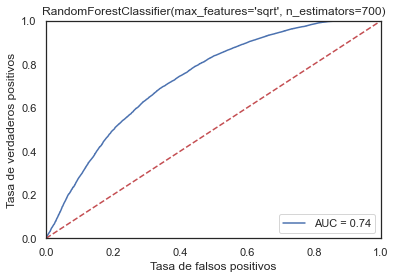

In [12]:
roc(model_rfc,X_test,y_test)

In [13]:
print(classification_report(y_test,model_rfc.predict(X_test)))

              precision    recall  f1-score   support

           0       0.56      0.30      0.39      8933
           1       0.86      0.95      0.90     41531

    accuracy                           0.83     50464
   macro avg       0.71      0.62      0.65     50464
weighted avg       0.81      0.83      0.81     50464



In [ ]:
# extratree

In [8]:
from sklearn.ensemble import ExtraTreesClassifier
modelo_etc=ExtraTreesClassifier(n_estimators= 32)
modelo_etc.fit(X_res,y_res)
modelo_etc.score(X_test,y_test)

0.8237555485098288

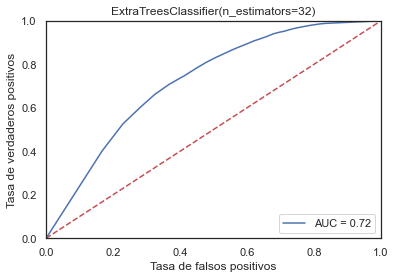

In [9]:
roc(modelo_etc,X_test,y_test)

In [19]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.svm import SVC

In [11]:
def modelo(modelo):
    modelo_etc=modelo()
    modelo_etc.fit(X_res,y_res)
    return modelo_etc.score(X_test,y_test)

In [15]:
def clas(modelo):
    modelo_etc=modelo()
    modelo_etc.fit(X_res,y_res)
    return print(classification_report(y_test,modelo_etc.predict(X_test)))

In [12]:
modelo(RandomForestClassifier)

0.8326926125554851

In [13]:
modelo(AdaBoostClassifier)

0.7330374128091313

In [18]:
clas(RandomForestClassifier)

              precision    recall  f1-score   support

           0       0.56      0.30      0.39      8933
           1       0.86      0.95      0.90     41531

    accuracy                           0.83     50464
   macro avg       0.71      0.63      0.65     50464
weighted avg       0.81      0.83      0.81     50464



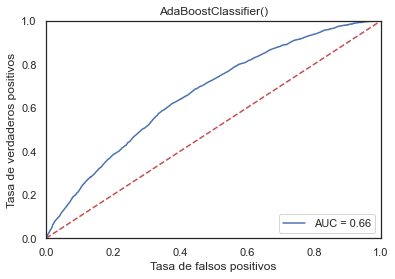

In [16]:
roc(AdaBoostClassifier().fit(X_res,y_res),X_test,y_test)

In [14]:
modelo(GradientBoostingClassifier)

0.8252021242866202

In [20]:
clas(GradientBoostingClassifier)

              precision    recall  f1-score   support

           0       0.52      0.25      0.34      8933
           1       0.86      0.95      0.90     41531

    accuracy                           0.83     50464
   macro avg       0.69      0.60      0.62     50464
weighted avg       0.80      0.83      0.80     50464



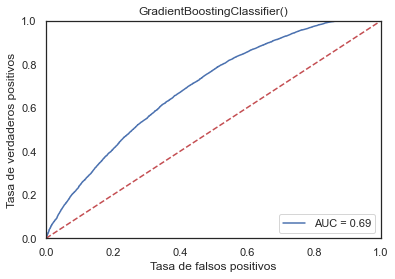

In [17]:
roc(GradientBoostingClassifier().fit(X_res,y_res),X_test,y_test)

In [22]:

GNB_model=GaussianNB().fit(X_res, y_res)
GNB_model.score(X_test,y_test)
print(classification_report(y_test,GNB_model.predict(X_test)))

              precision    recall  f1-score   support

           0       0.25      0.41      0.31      8933
           1       0.85      0.73      0.79     41531

    accuracy                           0.67     50464
   macro avg       0.55      0.57      0.55     50464
weighted avg       0.75      0.67      0.70     50464



In [24]:
from sklearn.ensemble import BaggingClassifier
m_bag=BaggingClassifier().fit(X_res,y_res)
print(classification_report(y_test,m_bag.predict(X_test)))

              precision    recall  f1-score   support

           0       0.45      0.35      0.40      8933
           1       0.87      0.91      0.89     41531

    accuracy                           0.81     50464
   macro avg       0.66      0.63      0.64     50464
weighted avg       0.79      0.81      0.80     50464



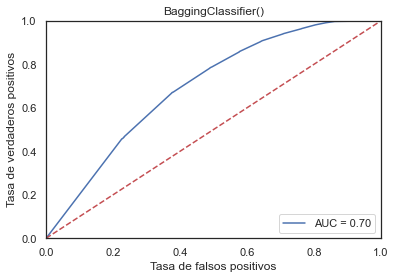

In [25]:
roc(m_bag,X_test,y_test)

# Undersampling

In [28]:
from imblearn.under_sampling import RandomUnderSampler
rus = RandomUnderSampler(random_state=42)
X_rus, y_rus = rus.fit_resample(X_train, y_train)

In [61]:
print(classification_report(y_test,m_bag.predict(X_test)))

              precision    recall  f1-score   support

           0       0.26      0.67      0.38      8933
           1       0.89      0.60      0.72     41531

    accuracy                           0.61     50464
   macro avg       0.58      0.63      0.55     50464
weighted avg       0.78      0.61      0.66     50464



In [62]:
confusion_matrix(y_test,m_bag.predict(X_test))

array([[ 5960,  2973],
       [16669, 24862]], dtype=int64)

In [57]:
print(classification_report(y_res,m_bag.predict(X_res)))

              precision    recall  f1-score   support

           0       0.75      0.96      0.84    166454
           1       0.94      0.67      0.79    166454

    accuracy                           0.82    332908
   macro avg       0.84      0.82      0.81    332908
weighted avg       0.84      0.82      0.81    332908



In [76]:
print(classification_report(y_res,m_bag.predict(X_res)))

              precision    recall  f1-score   support

           0       0.75      0.96      0.84    166454
           1       0.94      0.67      0.79    166454

    accuracy                           0.82    332908
   macro avg       0.84      0.82      0.81    332908
weighted avg       0.84      0.82      0.81    332908



In [59]:
confusion_matrix(y_res,m_bag.predict(X_res))

array([[159647,   6807],
       [ 54100, 112354]], dtype=int64)

In [29]:
m_bag=BaggingClassifier().fit(X_rus,y_rus)
print(classification_report(y_test,m_bag.predict(X_test)))

              precision    recall  f1-score   support

           0       0.26      0.67      0.38      8933
           1       0.89      0.60      0.72     41531

    accuracy                           0.61     50464
   macro avg       0.58      0.63      0.55     50464
weighted avg       0.78      0.61      0.66     50464



In [30]:
GNB_model=GaussianNB().fit(X_rus, y_rus)
GNB_model.score(X_test,y_test)
print(classification_report(y_test,GNB_model.predict(X_test)))

              precision    recall  f1-score   support

           0       0.27      0.38      0.31      8933
           1       0.85      0.77      0.81     41531

    accuracy                           0.70     50464
   macro avg       0.56      0.58      0.56     50464
weighted avg       0.75      0.70      0.72     50464



In [32]:
def modelo_rus(modelo):
    model=modelo().fit(X_rus,y_rus)
    return print(classification_report(y_test,model.predict(X_test)))

In [33]:
modelo_rus(GradientBoostingClassifier)

              precision    recall  f1-score   support

           0       0.32      0.59      0.41      8933
           1       0.89      0.73      0.80     41531

    accuracy                           0.71     50464
   macro avg       0.61      0.66      0.61     50464
weighted avg       0.79      0.71      0.73     50464



In [34]:
modelo_rus(AdaBoostClassifier)

              precision    recall  f1-score   support

           0       0.27      0.62      0.38      8933
           1       0.89      0.64      0.75     41531

    accuracy                           0.64     50464
   macro avg       0.58      0.63      0.56     50464
weighted avg       0.78      0.64      0.68     50464



In [37]:
from sklearn.ensemble import ExtraTreesClassifier
modelo_rus(ExtraTreesClassifier)

              precision    recall  f1-score   support

           0       0.29      0.64      0.39      8933
           1       0.89      0.66      0.76     41531

    accuracy                           0.65     50464
   macro avg       0.59      0.65      0.58     50464
weighted avg       0.79      0.65      0.69     50464



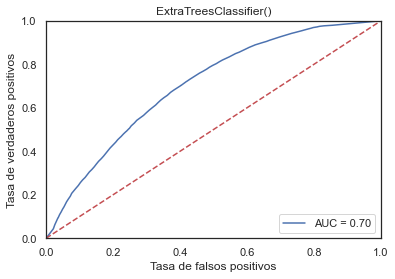

In [41]:
roc(ExtraTreesClassifier().fit(X_rus,y_rus),X_test,y_test)

In [ ]:
#Hacer con tiempo

In [63]:
depth_range = range(1, 10)
leaf_range = range(1,15)
param_grid = dict(max_depth=depth_range, min_samples_leaf=leaf_range)
d_tree = ExtraTreesClassifier()
grid = GridSearchCV(d_tree, param_grid, cv=10, scoring='accuracy')
grid.fit(X_rus,y_rus)
print (grid.best_score_)
print (grid.best_params_)
print (grid.best_estimator_)

KeyboardInterrupt: 

In [47]:
#cambio de preprocesado
from sklearn import preprocessing
normalized_X = preprocessing.normalize(X_rus)
standardized_X = preprocessing.scale(X_rus)

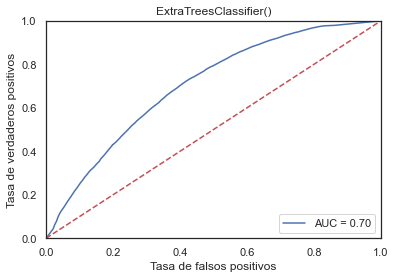

In [51]:
roc(ExtraTreesClassifier().fit(X_rus,y_rus),X_test,y_test)

In [65]:
from imblearn.over_sampling import RandomOverSampler
ros = RandomOverSampler(random_state=42)
X_ros, y_ros = ros.fit_resample(X_train, y_train)

In [66]:
def modelo_ros(modelo):
    model=modelo().fit(X_ros,y_ros)
    return print(classification_report(y_test,model.predict(X_test)))

In [54]:
modelo_ros(AdaBoostClassifier)

              precision    recall  f1-score   support

           0       0.27      0.62      0.38      8933
           1       0.89      0.65      0.75     41531

    accuracy                           0.64     50464
   macro avg       0.58      0.63      0.56     50464
weighted avg       0.78      0.64      0.68     50464



In [55]:
modelo_ros(ExtraTreesClassifier)

              precision    recall  f1-score   support

           0       0.90      1.00      0.94      8933
           1       1.00      0.98      0.99     41531

    accuracy                           0.98     50464
   macro avg       0.95      0.99      0.97     50464
weighted avg       0.98      0.98      0.98     50464



In [68]:
modelo_ros(ExtraTreesClassifier)

              precision    recall  f1-score   support

           0       0.50      0.33      0.40      8933
           1       0.87      0.93      0.90     41531

    accuracy                           0.82     50464
   macro avg       0.68      0.63      0.65     50464
weighted avg       0.80      0.82      0.81     50464



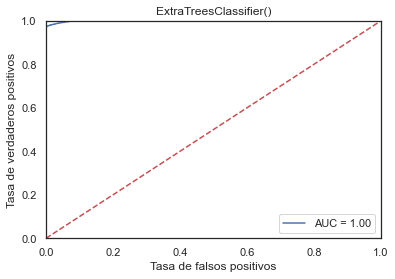

In [64]:
roc(ExtraTreesClassifier().fit(X_ros,y_ros),X_test,y_test)

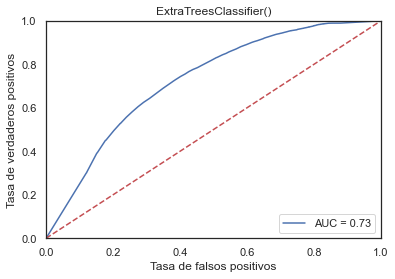

In [67]:
roc(ExtraTreesClassifier().fit(X_ros,y_ros),X_test,y_test)

In [69]:
ros = RandomOverSampler(random_state=42)
X_ros_train, y_ros_train = ros.fit_resample(X_train, y_train)
X_ros_test, y_ros_test = ros.fit_resample(X_test, y_test)